In [1]:
from naglmbis.models import load_charge_model
from openff.toolkit.topology import Molecule
import time
from interruptingcow import timeout

In [2]:
charge_model_esp= 'nagl-gas-charge-dipole-esp-wb-default'
gas_charge_dipole_esp_model = load_charge_model(charge_model_esp)

In [3]:
charge_model_esp= 'nagl-gas-charge-dipole-esp-wb-default'
gas_charge_dipole_esp_model = load_charge_model(charge_model_esp)

number_of_atoms = []
am1_bcc_times = []
nagl_mbis_times = []
start_molecule = 'C'
for i in range(25):
    #am1bcc
    print(f'am1bcc charges for {start_molecule}')
    molecule = Molecule.from_smiles(start_molecule, hydrogens_are_explicit=False)
    molecule.generate_conformers(n_conformers=1)
    start_time = time.perf_counter()
    try:
        molecule.assign_partial_charges(
            partial_charge_method='am1bcc',
            strict_n_conformers=1
        )
    except Exception as e:  # Catch all exceptions for debugging
        print(f"Exception occurred: {type(e).__name__} - {e}")
        molecule.assign_partial_charges(
            partial_charge_method="am1bcc",
            use_conformers=molecule.conformers,
        )
    end_time = time.perf_counter()
    number_of_atoms.append(molecule.n_atoms)
    am1_bcc_times.append(abs(start_time-end_time))
    #naglmbis
    print(f'naglmbis charges for {start_molecule}')
    rdkit_mol = molecule.to_rdkit()
    start_time = time.perf_counter()
    predicted_charges = gas_charge_dipole_esp_model.compute_properties(rdkit_mol)["mbis-charges"]
    end_time = time.perf_counter()
    nagl_mbis_times.append(abs(start_time-end_time))
    start_molecule = start_molecule+'C'
    


am1bcc charges for C
naglmbis charges for C
am1bcc charges for CC
naglmbis charges for CC
am1bcc charges for CCC
naglmbis charges for CCC
am1bcc charges for CCCC
naglmbis charges for CCCC
am1bcc charges for CCCCC
naglmbis charges for CCCCC
am1bcc charges for CCCCCC
naglmbis charges for CCCCCC
am1bcc charges for CCCCCCC
naglmbis charges for CCCCCCC
am1bcc charges for CCCCCCCC
naglmbis charges for CCCCCCCC
am1bcc charges for CCCCCCCCC
naglmbis charges for CCCCCCCCC
am1bcc charges for CCCCCCCCCC
naglmbis charges for CCCCCCCCCC
am1bcc charges for CCCCCCCCCCC
naglmbis charges for CCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCC
naglmbis charges for CCCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCCC
naglmbis charges for CCCCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCCCC
naglmbis charges for CCCCCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCCCCC
naglmbis charges for CCCCCCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCCCCCC
naglmbis charges for CCCCCCCCCCCCCCCC
am1bcc charges for CCCCCCCCCCCCCCCCC
naglmbis charges fo

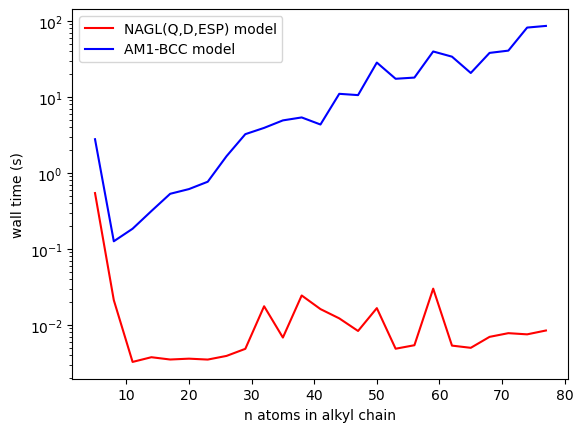

In [4]:
import matplotlib.pyplot as plt
plt
plt.plot(number_of_atoms,nagl_mbis_times, color='red', label='NAGL(Q,D,ESP) model')
plt.plot(number_of_atoms,am1_bcc_times, color='blue', label='AM1-BCC model')
plt.yscale('log')
plt.xlabel('n atoms in alkyl chain')
plt.ylabel('wall time (s)')
plt.legend()
plt.savefig('AM1BCCvsNagl.png',dpi=300)
plt.show()


In [ ]:
start_molecule ='C(C)(=O)NC(C)C(=O)NC'
frag = 'C(C)(=O)NC(C)'
end_frag ='C(=O)NC'

number_of_atoms = []
am1_bcc_times = []
nagl_mbis_times = []
for i in range(200):
    #am1bcc
    print(f'am1bcc charges for {start_molecule}')
    molecule = Molecule.from_smiles(start_molecule, allow_undefined_stereo=True)
    molecule.generate_conformers(n_conformers=1)
    start_time = time.perf_counter()
    molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)
    end_time = time.perf_counter()
    number_of_atoms.append(molecule.n_atoms)
    am1_bcc_times.append(abs(start_time-end_time))
    #naglmbis
    print(f'naglmbis charges for {start_molecule}')
    rdkit_mol = molecule.to_rdkit()
    start_time = time.perf_counter()
    try:
        with timeout(1000, exception=RuntimeError):
            predicted_charges = gas_charge_dipole_esp_model.compute_properties(rdkit_mol)["mbis-charges"]
            end_time = time.perf_counter()
            total_time = abs(start_time-end_time)
    except RuntimeError:
        total_time = 1000
    nagl_mbis_times.append(total_time)
    
    frag = frag + 'C(C)'
    start_molecule = frag + end_frag

am1bcc charges for C(C)(=O)NC(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(

/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 154 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 160 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 166 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 172 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 178 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 184 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 190 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 196 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)


naglmbis charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC
am1bcc charges for C(C)(=O)NC(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(C)C(=O)NC


/var/folders/5m/c625w21d6q3cgv41hc6yjs100000gq/T/ipykernel_97245/3230508180.py:14: UserWarning: Warning! Partial charge method 'am1bcc' is not designed for use on large (i.e. > 150 atoms) molecules and may crash or take hours to run on this molecule (found 202 atoms). For more, see https://docs.openforcefield.org/projects/toolkit/en/stable/faq.html#parameterizing-my-system-which-contains-a-large-molecule-is-taking-forever-whats-wrong
  molecule.assign_partial_charges('am1bcc', use_conformers=molecule.conformers, strict_n_conformers=1)
